<a href="https://colab.research.google.com/github/TejaswiniVechalapu/ML_EXP/blob/main/mlexp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install decision-tree-id3
import matplotlib.pyplot as plt
import pandas as pd
import six
import sys
sys.modules['sklearn.externals.six']=six
from id3 import Id3Estimator

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 3.1 MB/s eta 0:00:00
  Created wheel for decision-tree-id3: filename=decision_tree_id3-0.1.2-py3-none-any.whl size=15939 sha256=85b182ad3adae7976b4a0d658d4932878ed615360d1791a658296dd0ae1ee6e6
  Stored in directory: /root/.cache/pip/wheels/b5/48/52/e8ac7a547a6343fce8e441f4db4a9052c7a8547fd91f413363
Successfully built decision-tree-id3


In [ ]:
tennis_data=pd.read_csv('/content/drive/MyDrive/PlayTennis.csv')
tennis_data.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
tennis_data['Outlook']=le.fit_transform(tennis_data['Outlook'])
tennis_data['Temperature']=le.fit_transform(tennis_data['Temperature'])
tennis_data['Humidity']=le.fit_transform(tennis_data['Humidity'])
tennis_data['Wind']=le.fit_transform(tennis_data['Wind'])
tennis_data['Play Tennis']=le.fit_transform(tennis_data['Play Tennis'])

In [ ]:
tennis_data

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [ ]:
y=tennis_data['Play Tennis']
x=tennis_data.drop(['Play Tennis'],axis=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier,export_text
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
tree_rules=export_text(clf,feature_names=list(x.columns))
print(tree_rules)

|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Wind <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Wind >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- Temperature <= 1.00
|   |   |   |   |--- class: 0
|   |   |   |--- Temperature >  1.00
|   |   |   |   |--- class: 1
|   |   |--- Wind >  0.50
|   |   |   |--- class: 1



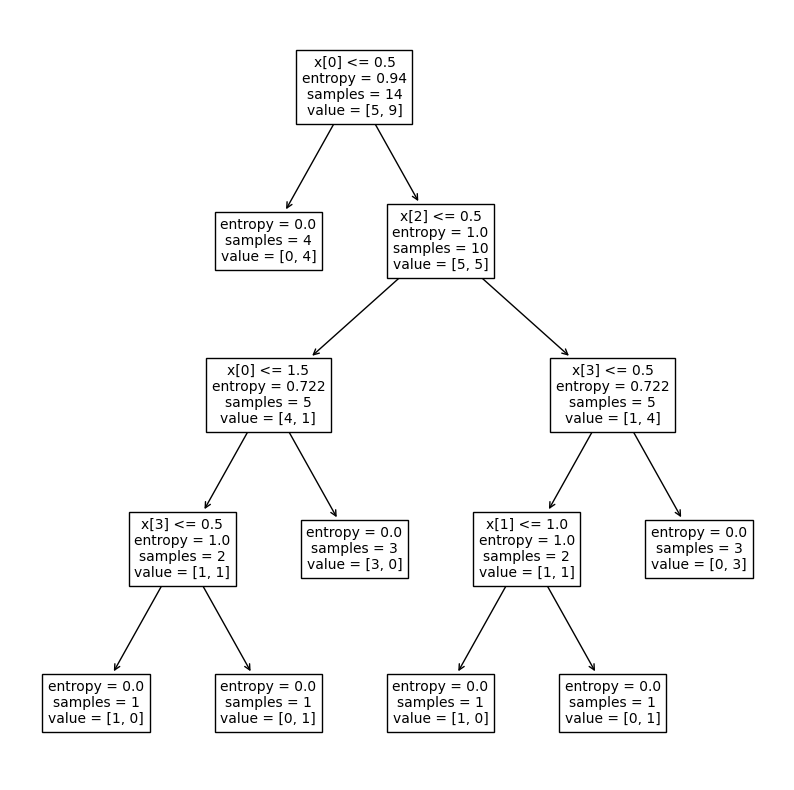

In [ ]:
from sklearn import tree
fig,ax=plt.subplots(figsize=(10,10))
tree.plot_tree(clf,fontsize=10)
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
dot_data=export_graphviz(clf,feature_names=list(x.columns),filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph.render("Decision_Tree",format="png",cleanup=True)

'Decision_Tree.png'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from id3 import Id3Estimator,export_text
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1,random_state=0)
estimator=Id3Estimator()
estimator.fit(X_train,Y_train)
Y_pred=estimator.predict(X_test)
print("Classification_report:")
print(classification_report(Y_test,Y_pred))
print("Accuaracy Score:",accuracy_score(Y_test,Y_pred))

Classification_report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Accuaracy Score: 1.0


In [ ]:

tr=export_text(estimator.tree_,feature_names=list(X_train.columns))
print(tr)



Outlook <=0.50: 1 (3) 
Outlook >0.50
|   Humidity <=0.50
|   |   Temperature <=1.50: 0 (2) 
|   |   Temperature >1.50
|   |   |   Wind <=0.50: 0 (1) 
|   |   |   Wind >0.50: 0 (1/1) 
|   Humidity >0.50
|   |   Temperature <=1.00
|   |   |   Wind <=0.50: 0 (1) 
|   |   |   Wind >0.50: 1 (1) 
|   |   Temperature >1.00: 1 (2) 

